```
pip install pandas numpy seaborn matplotlib scipy scikit-learn xgboost graphviz
conda install lightgbm -y
brew install cmake libomp
brew install graphviz
```

In [1]:
import warnings
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:85% !important; }</style>"))

from ml_classifiers import Classifiers
from sklearn.metrics import accuracy_score
from joblib import dump, load
from scipy.stats import uniform as sp_uniform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc, font_manager

font_path = "/Library/Fonts/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
fontprop = font_manager.FontProperties(fname=font_path, size=14)

from lightgbm import early_stopping, log_evaluation

# Binary classification

## Load Dataset
- breast_cancer 데이터 적용 예시 (Binary classification)

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(
    breast_cancer["data"], columns=breast_cancer["feature_names"]
)
df_breast_cancer["label"] = breast_cancer["target"]
df_breast_cancer["label"].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: label, dtype: float64

## Create Object
- 객체를 생성해 주세요.

In [3]:
clf = Classifiers(
    feature_scaler="RobustScaler"  # feature scaling을 원할 경우 먼저 지정합니다. (StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer)
)

## Model List
- 모듈에 선언되어 있는 모델을 확인해 봅니다. 추가할 모델이 있다면 모듈의 코드를 수정해 주세요.

In [4]:
list(clf.get_classifier_models())

['MLPClassifier',
 'KNeighborsClassifier',
 'SVC',
 'GaussianProcessClassifier',
 'DecisionTreeClassifier',
 'ExtraTreesClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GaussianNB',
 'QuadraticDiscriminantAnalysis',
 'GradientBoostingClassifier',
 'LogisticRegression',
 'XGBClassifier',
 'LGBMClassifier']

## Cross Validation
- 모델별 교차검증에 따른 성능을 확인해 봅니다.
- 이진 분류의 경우 scoring을 지정하지 않아도 Accuracy, F1-score, Precision, Recall, ROC-AUC를 자동으로 계산합니다.
- 이 외의 score도 확인하고 싶다면 모듈의 코드를 수정해 주세요.

In [5]:
# 모델별 파라미터를 지정할 수 있습니다.

estimator_fit_params = {
    "DecisionTreeClassifier": {
        "criterion": "entropy",
        "splitter": "random",
        "max_depth": 100,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
    },
    "RandomForestClassifier": {
        "n_estimators": 100,
        "criterion": "entropy",
        "max_depth": 10,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
        "bootstrap": True,
    },
#     "MLPClassifier": {
#         "max_iter": 2000,
#         "alpha": 1e-4,
#         "activation": "relu",
#         "solver": "adam",
#         "learning_rate_init": 0.001,
#         "hidden_layer_sizes": (3,),
#     },
#     "LogisticRegression": {
#         "penalty": "l2",
#         "solver": "lbfgs",
#         "max_iter": 2000,
#         "C": 0.01,
#         "tol": 0.01,
#         "warm_start": True,
#         "fit_intercept": True,
#     },
#     "GradientBoostingClassifier": {
#         "loss": "log_loss",
#         "learning_rate": 0.001,
#         "n_estimators": 100,
#         "subsample": 0.5,
#         "criterion": "squared_error",
#         "min_samples_split": 3,
#         "min_samples_leaf": 3,
#         "max_depth": 100,
#         "max_features": "sqrt",
#         "n_iter_no_change": 5,
#     },
#     "XGBClassifier": {
#         "max_depth": 100,
#         "n_estimators": 500,
#         "learning_rate": 0.001,
#         "gamma": 0.1,
#         "eval_metric": "logloss",
#         "fit_params": {"verbose": False},
#     },
#     "LGBMClassifier": {
#         "max_depth": 100,
#         "n_estimators": 500,
#         "learning_rate": 0.001,
#         "num_leaves": 64,
#         "verbose": -1,
#         "eval_metric": "binary_logloss",
#     },
}

In [6]:
clf.run_cross_validation(
    estimators=[  # 모델을 지정해 주세요. estimators="all"로 하면 해당 모듈에 선언된 모든 모델을 사용하여 예측을 실행합니다.
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "GaussianProcessClassifier",
        "ExtraTreesClassifier",
        "XGBClassifier",
        "LGBMClassifier",
    ],
    data=df_breast_cancer,
    target="label",
    kfold="RepeatedStratifiedKFold",  # train, test 분할 방법을 지정해 주세요. 클래스 불균형이 크다면 Stratified를 쓰는게 좋습니다.
    n_splits=5,  # K-Fold의 K 값입니다. 기본값이 5라서 따로 지정하지 않으셔도 됩니다. 일반적으로 3, 5, 10을 많이 사용합니다.
    n_repeats=5,  # Cross Validation 반복 횟수입니다. 기본값은 10입니다만, 5로 해도 충분한 것 같습니다. 단, 'RepeatedStratifiedKFold'와 'RepeatedKFold'에 한해서 동작합니다.
    estimator_fit_params=estimator_fit_params,  # 모델별 파라미터를 지정하지 않는다면 디폴트 파라미터로 수행합니다. (estimator_fit_params=None)
)

 -------------- Start to create performance metric by estimator. -------------- 
 >>> DecisionTreeClassifier running... 
estimator_params: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> ExtraTreesClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 1s) 
 ------------------------------------------------------------------------------ 
 >>> GaussianProcessClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 1s) 
 ------------------------------------------------------------------------------ 
 >>> GradientBoostingClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 5s) 
 ------------------------------------------------------------------------------ 
 >>> LGBMClassi

,fit_time,score_time,test_score,scoring,estimator_name
0,0.011138,0.000276,0.903509,accuracy,DecisionTreeClassifier
1,0.000448,0.000163,0.885965,accuracy,DecisionTreeClassifier
2,0.000597,0.000172,0.912281,accuracy,DecisionTreeClassifier
3,0.000544,0.000173,0.912281,accuracy,DecisionTreeClassifier
4,0.000493,0.000171,0.929204,accuracy,DecisionTreeClassifier
...,...,...,...,...,...
870,0.062647,0.001049,0.979037,roc_auc,XGBClassifier
871,0.085997,0.001007,0.981002,roc_auc,XGBClassifier
872,0.074392,0.001041,0.999008,roc_auc,XGBClassifier
873,0.056091,0.001042,1.000000,roc_auc,XGBClassifier


### Performance Metrics
- 모델별 성능을 확인해 봅니다.

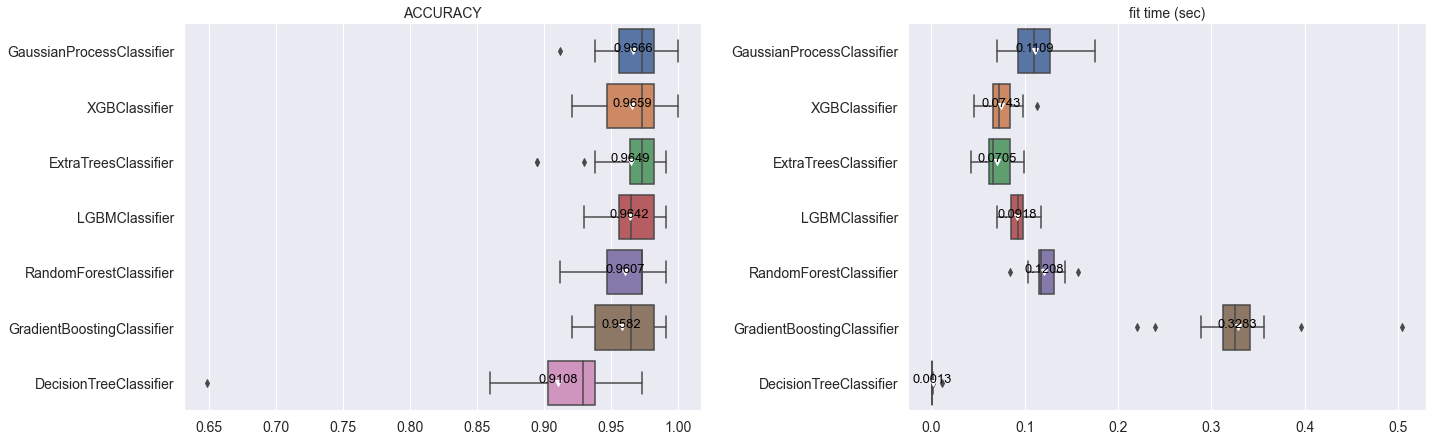

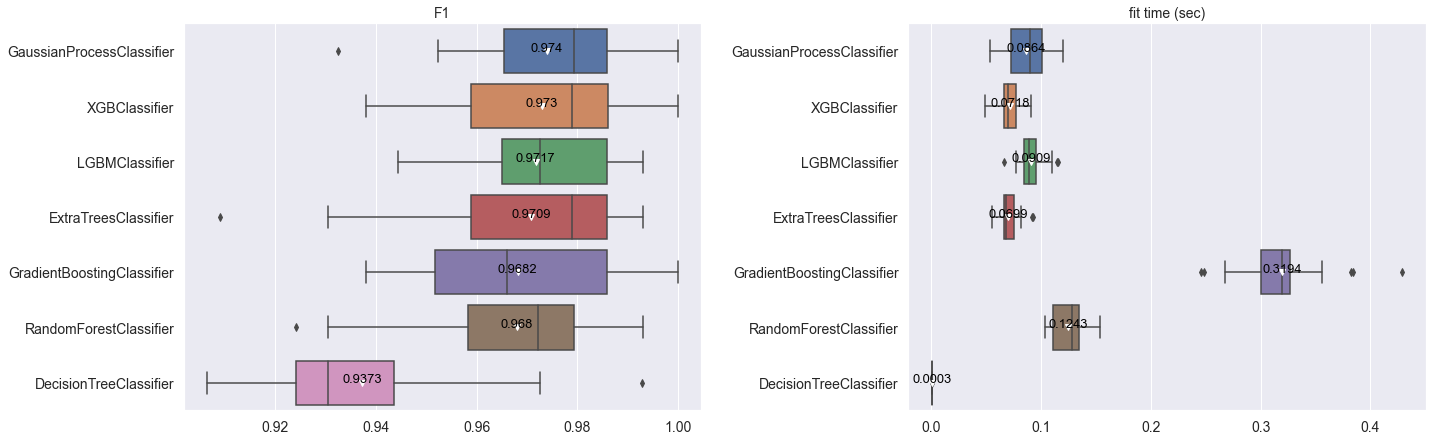

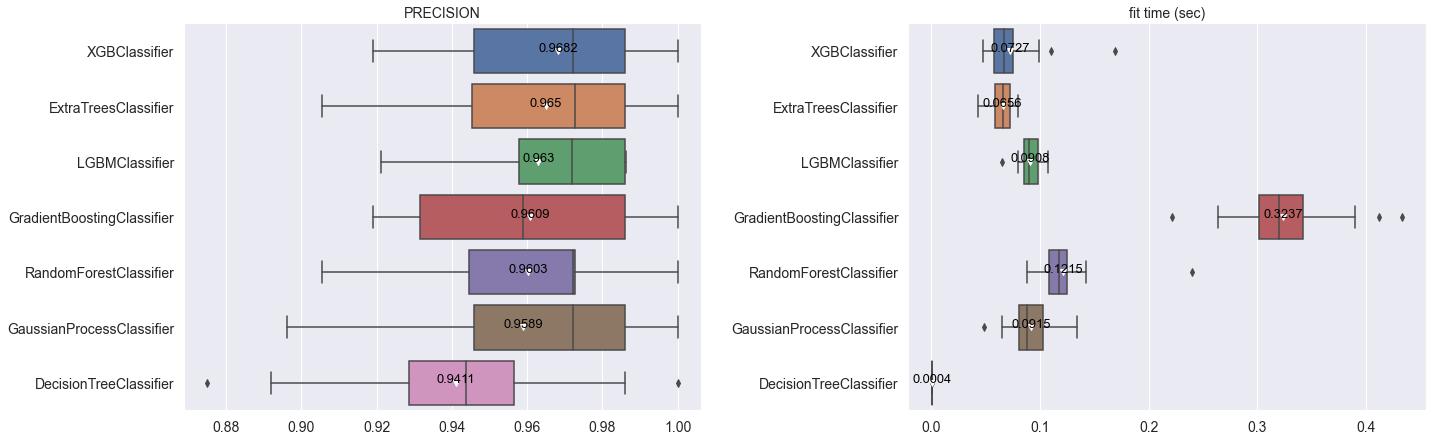

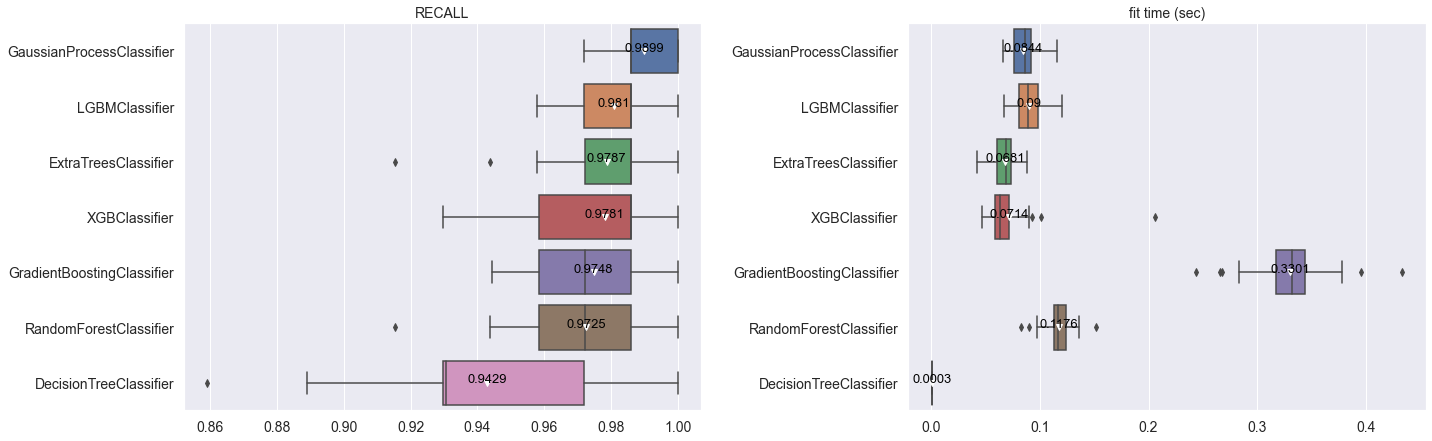

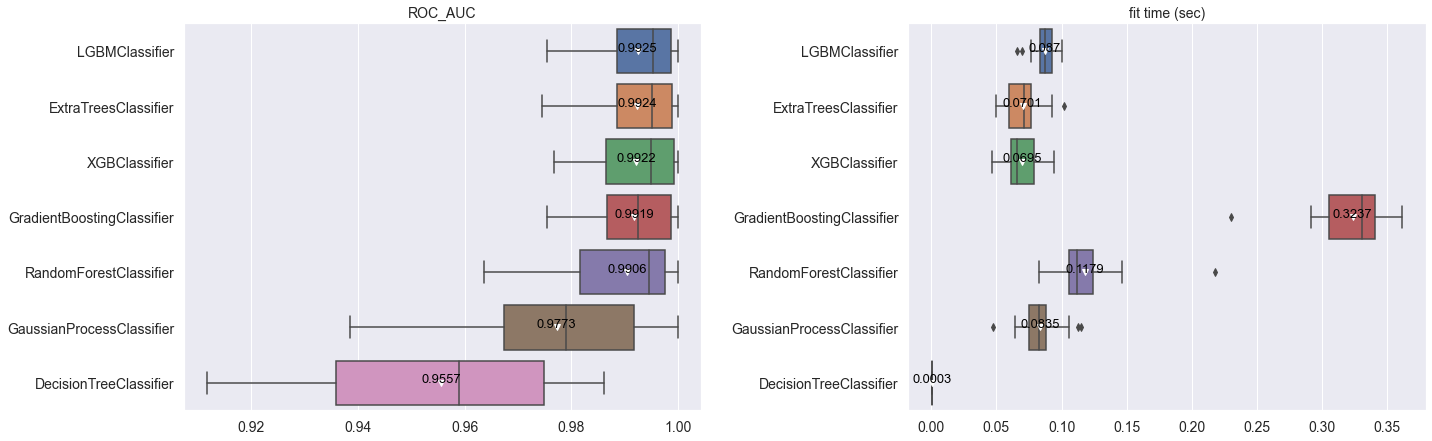

In [7]:
clf.show_cross_validation_result()

## Search Hyperparameters
- 파라미터 그리드(grid)를 생성하고, 하이퍼파라미터 튜닝을 통해 모델별 성능을 확인해 봅니다.

In [8]:
hyperparams_space = {
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
    },
    "RandomForestClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "criterion": ["gini", "entropy"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
    },
    "MLPClassifier": {
        "max_iter": [2000],
        "alpha": [1e-4],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs", "sgd", "adam"],
        "learning_rate_init": [0.001, 0.005, 0.01],
        "hidden_layer_sizes": [(2,), (3,), (4,), (5,)],
    },
    "LogisticRegression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
        "max_iter": [2000],
        "C": [0.01, 0.1, 10, 100],
        "tol": [0.01],
        "warm_start": [True, False],
        "fit_intercept": [True, False],
    },
    "GradientBoostingClassifier": {
        "loss": ["log_loss"],
        "learning_rate": [0.001, 0.01, 0.1],
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "subsample": [0.5, 1.0],
        "criterion": ["friedman_mse", "squared_error"],
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "max_features": ["sqrt", "log2", None],
        "n_iter_no_change": [5],
    },
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "colsample_bytree": [0.5],
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["logloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": [0.5],
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["binary_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

In [9]:
df = clf.search_hyperparameter(
    data=df_breast_cancer,
    target="label",
    search_method="random",  # 'grid', 'random', 'grid_halving', 'random_halving' 중 지정해주세요.
    hyperparams_space=hyperparams_space,  # 위에서 선언한 모델과 파라미터를 그대로 입력해줍니다.
    kfold="RepeatedStratifiedKFold",  # train, test 분할 방법을 지정해주세요. 클래스 불균형이 크다면 Stratified를 쓰는게 좋습니다.
    scoring="roc_auc",  # 성능 지표를 입력해주세요.
    n_splits=5,  # K-Fold의 K 값입니다. 기본값이 5라서 따로 지정하지 않으셔도 됩니다. 일반적으로 3, 5, 10을 많이 사용합니다.
    n_repeats=5,  # Cross Validation 반복 횟수입니다. 기본값은 10입니다만, 5로 해도 충분한 것 같습니다. 단, 'RepeatedStratifiedKFold'와 'RepeatedKFold'에 한해서 동작합니다.
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> DecisionTreeClassifier running... 
param_grid:
{'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'splitter': ['best', 'random']}
fit_params: None
 Best Parameters: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> GradientBoostingClassifier running... 
param_grid:
{'criterion': ['friedman_mse', 'squared_error'],
 'learning_rate': [0.001, 0.01, 0.1],
 'loss': ['log_loss'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  

### Performance Metrics
- 튜닝한 모델의 성능을 확인해 봅니다.

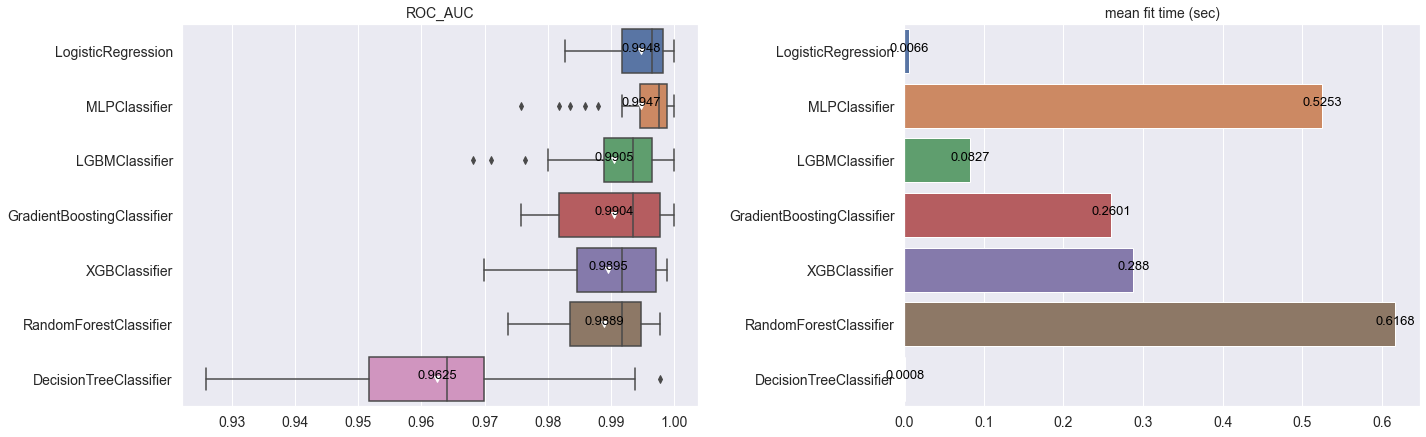

In [10]:
clf.show_hyperparameter_search_result()

## Feature Importance
- 튜닝한 모델의 Feature Importances를 확인해 봅니다.

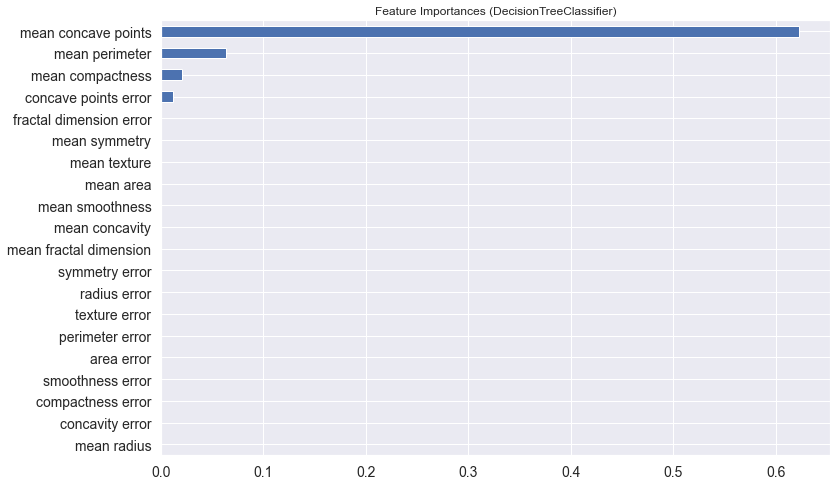

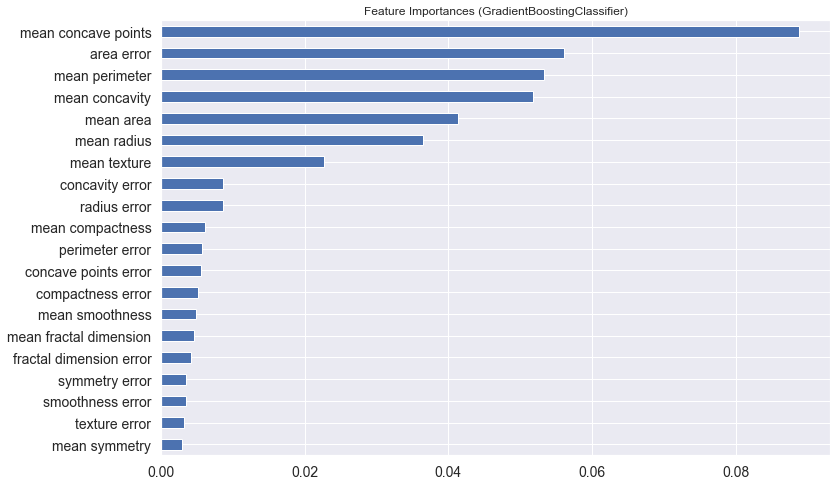

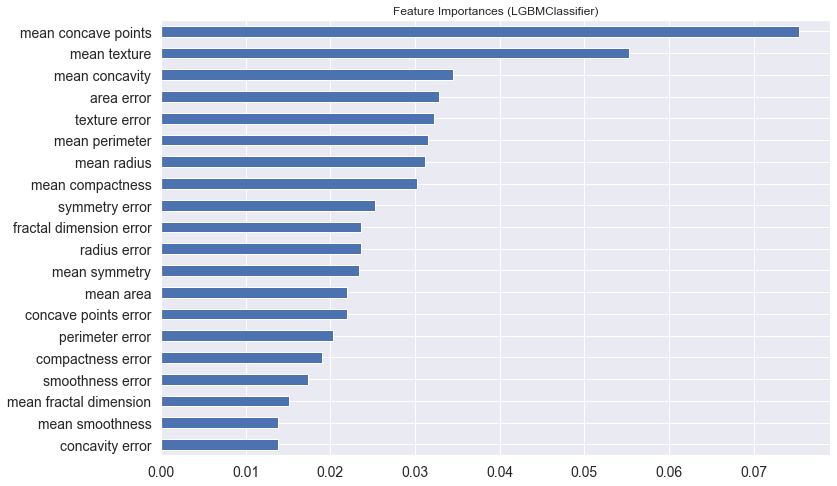

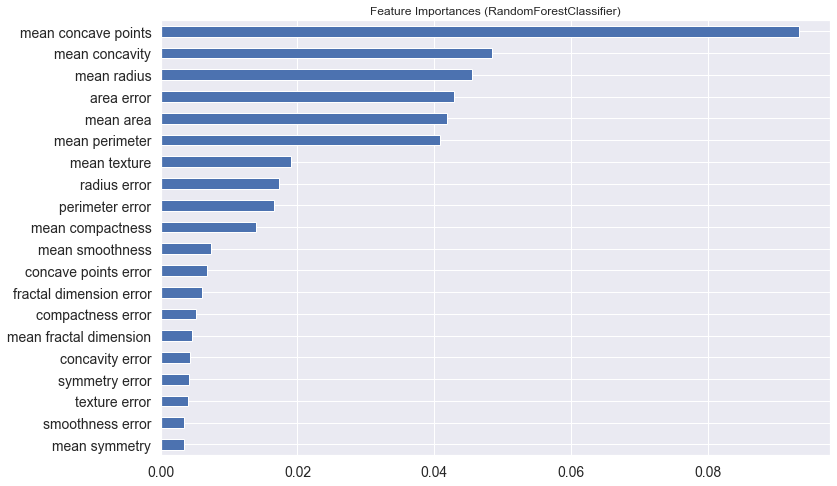

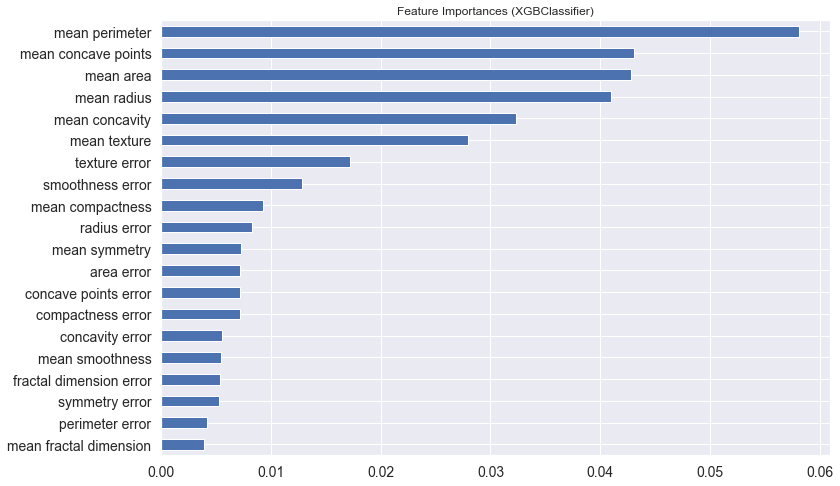

In [11]:
clf.show_feature_importances(n_features=20)  # 상위 20개까지만 추출합니다. (기본값: 10)

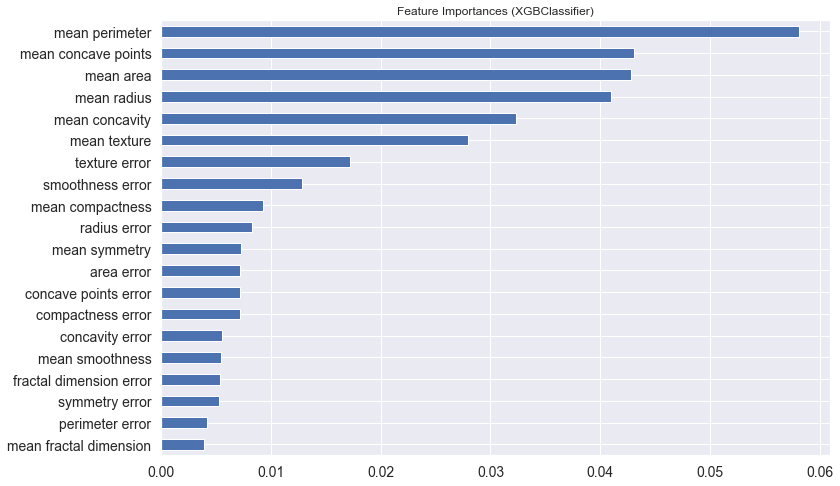

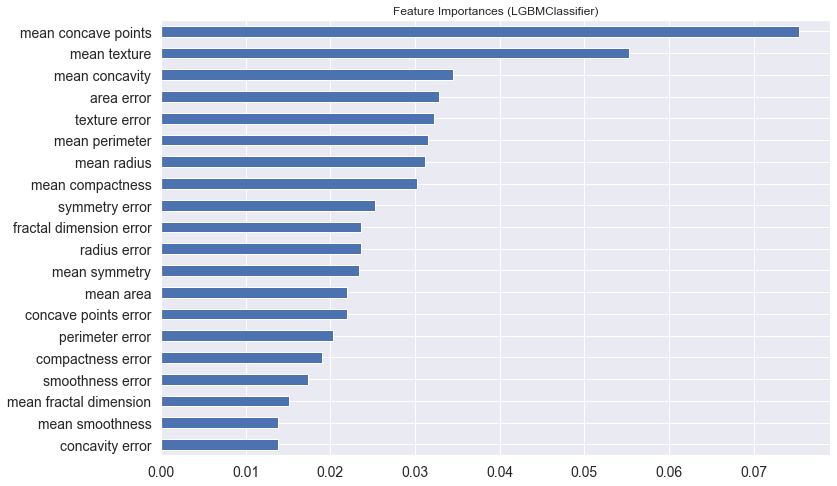

In [12]:
# 모델과 feature의 개수를 지정할 수도 있습니다.
clf.show_feature_importances(
    estimators=["XGBClassifier", "LGBMClassifier"],
    n_features=20,  # 상위 20개까지만 추출합니다. (기본값: 10)
)

## Permutation Importances
- 튜닝한 모델의 Permutation Importances를 확인해 봅니다.

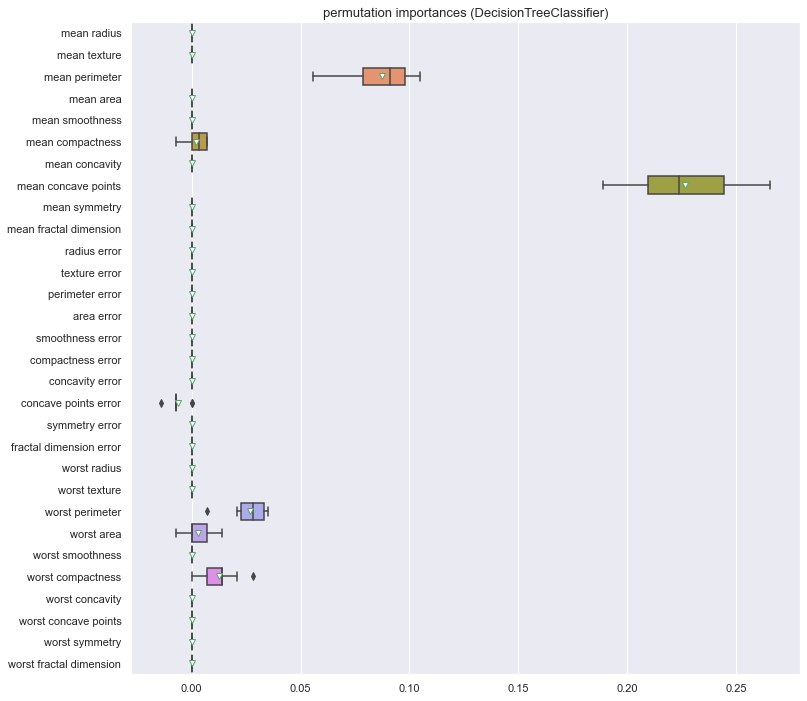

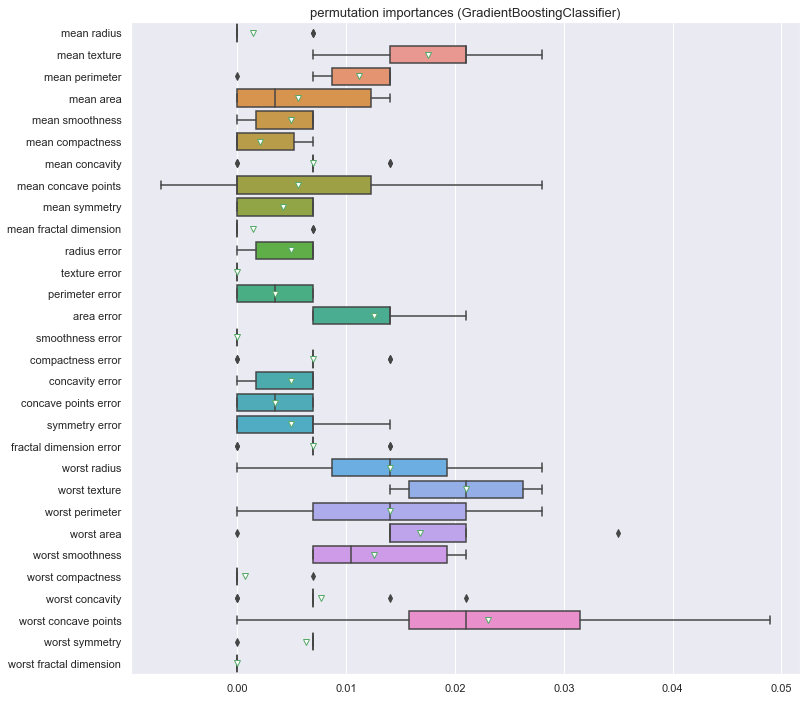

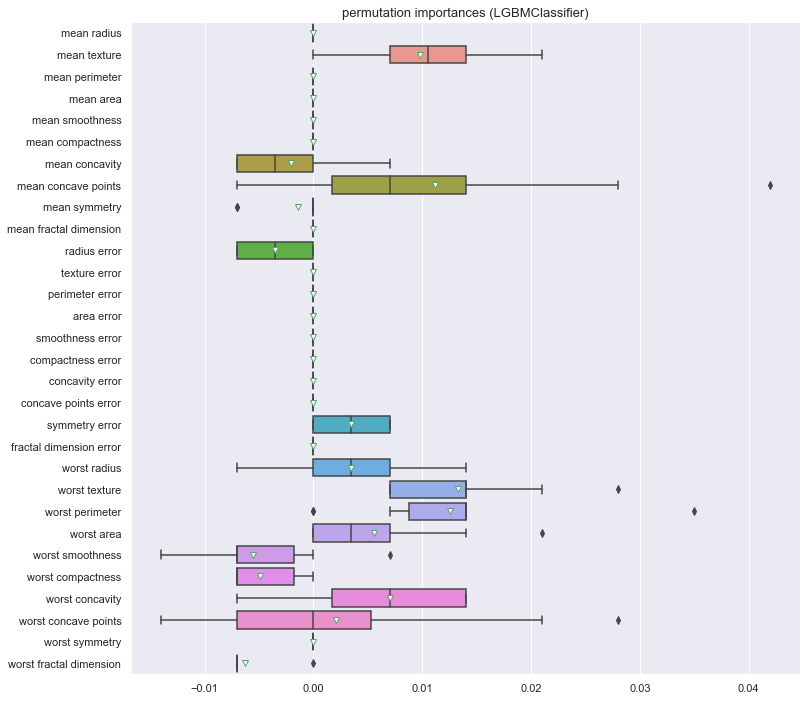

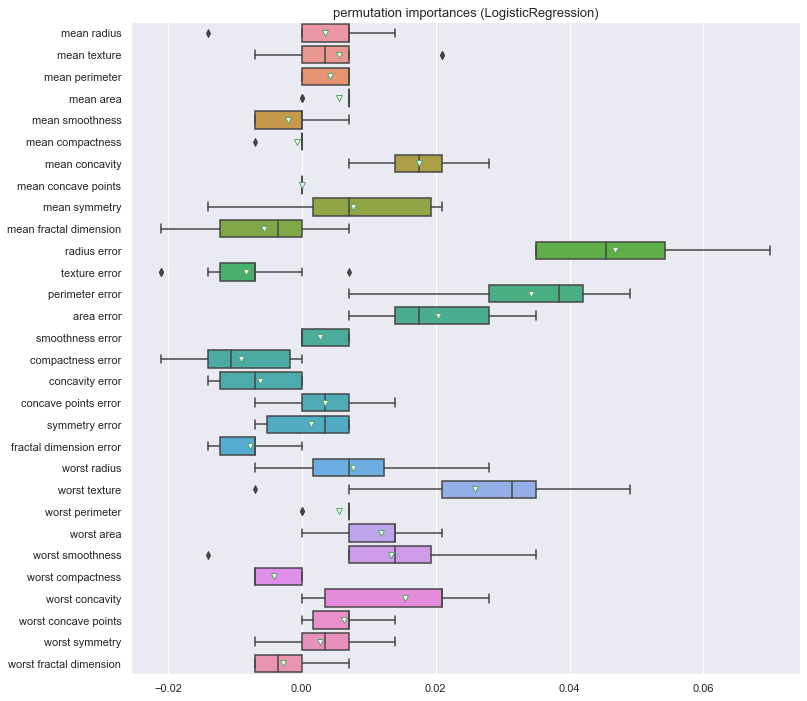

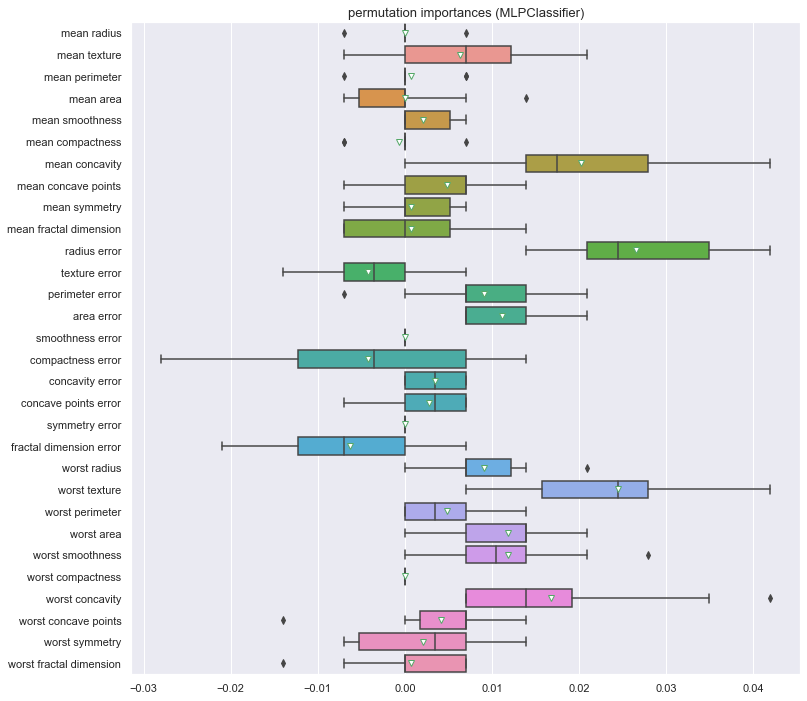

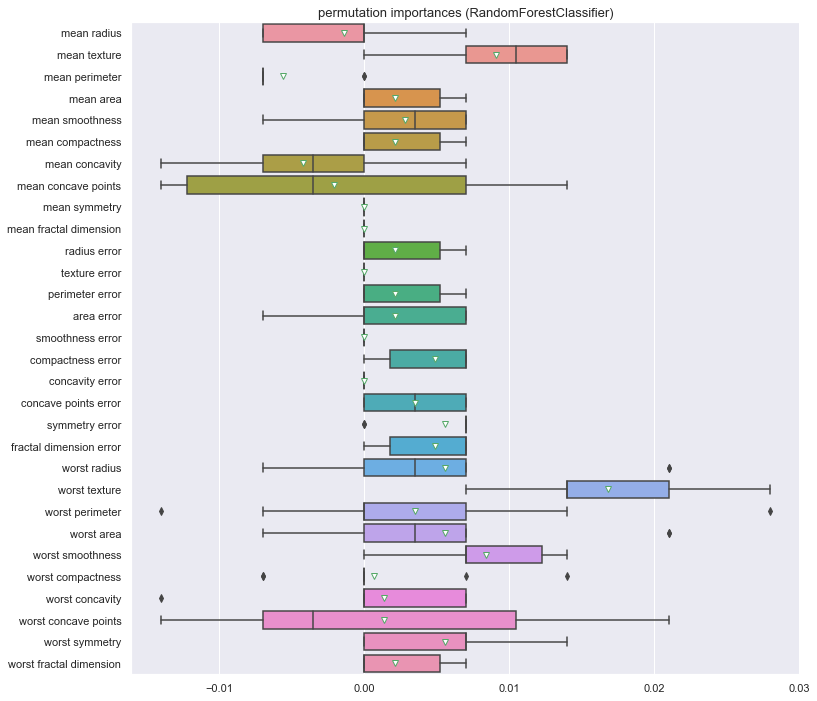

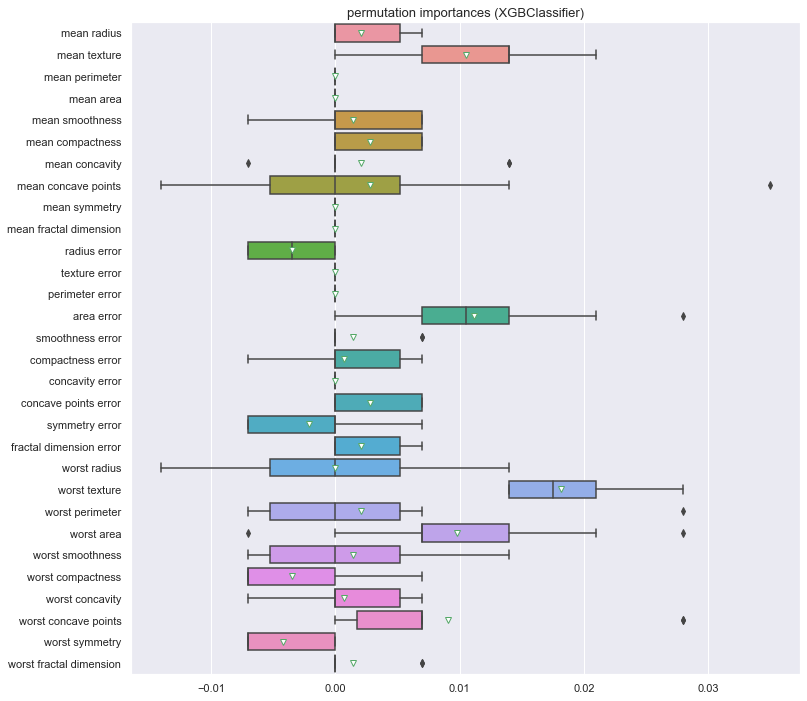

In [13]:
clf.show_permutation_importances(data=df_breast_cancer, target="label")

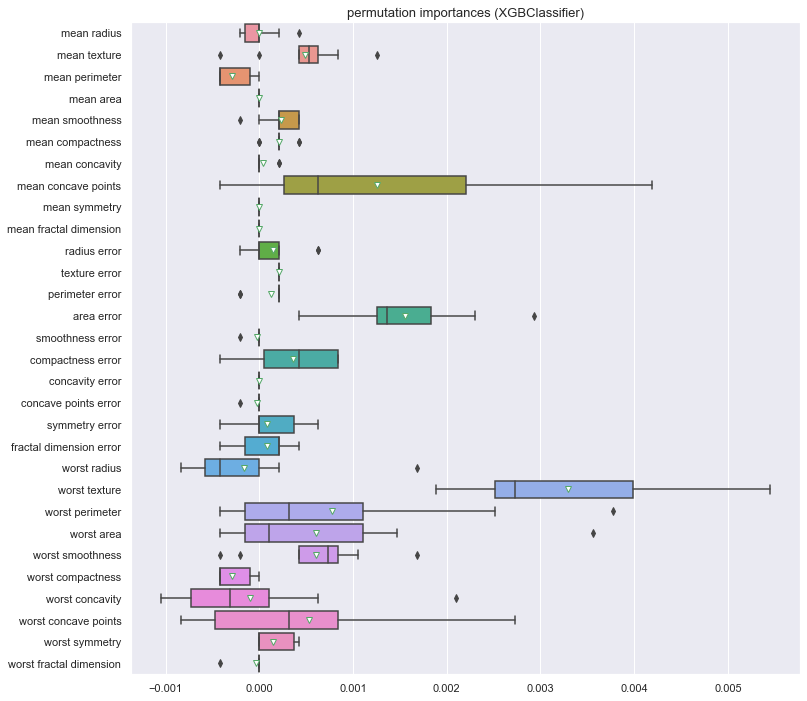

In [14]:
# 모델과 score를 따로 지정할 수도 있습니다.
clf.show_permutation_importances(
    estimators=["XGBClassifier"],
    data=df_breast_cancer,
    target="label",
    scoring="roc_auc",
)

## Best Model
- 최종 모델을 확인해 봅니다. 이 코드를 실행하는 경로 내의 model_savled 폴더에 .joblib 파일로 생성되어 있습니다.

In [15]:
clf.get_best_model_info()

{'mean_test_score': 0.994781029507901,
 'std_test_score': 0.004658844630979014,
 'mean_fit_time': 0.0035184955596923827,
 'estimator_name': 'LogisticRegression',
 'params': {'warm_start': True,
  'tol': 0.01,
  'solver': 'sag',
  'penalty': 'l2',
  'max_iter': 2000,
  'fit_intercept': False,
  'C': 10}}

In [16]:
# 최종 선택된 모델로 다시 예측해 봅니다.
features = df_breast_cancer.iloc[:, :-1].values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

best_model = clf.get_best_classifier()
pred = best_model.predict(features_scaled)

print(accuracy_score(df_breast_cancer["label"], pred))

 >>> Predict from new data. 
0.9156414762741653


## Load Model
- 로컬에 저장되어 있던 모델을 로드하여 실제 데이터로 다시 예측을 해봅니다. (LGBMClassifier이 저장된 것으로 가정)
- 이렇게 모델을 주기적으로 업데이트하여 저장해놓고, 업데이트된 모델을 실 예측에 사용하는 파이프라인 배치를 만들면 됩니다.

In [17]:
model = load("model_saved/LGBMClassifier.joblib")
pred = model.predict(X=features_scaled)

print(accuracy_score(df_breast_cancer["label"], pred))

0.9947275922671354


## Decision Tree
- (Appendix) Decision Tree를 튜닝한 경우, 트리 구조를 시각화해봅니다.

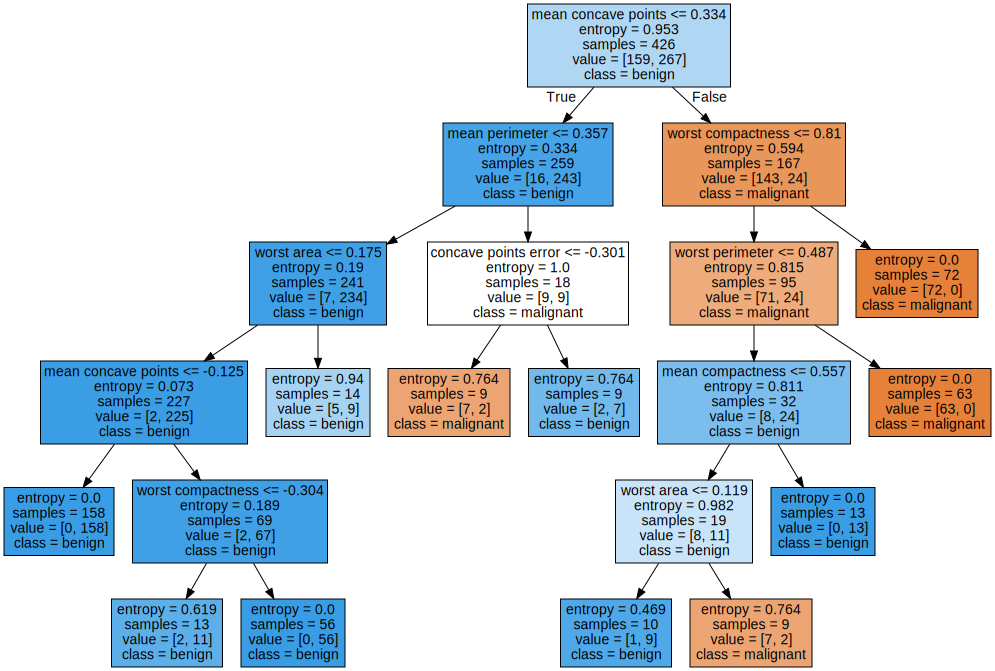

In [18]:
clf.show_decision_tree(
    feature_names=df_breast_cancer.columns[:-1], class_names=breast_cancer.target_names
)

# Multiclass classification

## Load Dataset
- wine 데이터 적용 예시 (Multiclass classification)

In [19]:
from sklearn.datasets import load_wine

wine = load_wine()
df_wine = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df_wine["label"] = wine["target"]
df_wine["label"].value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: label, dtype: float64

## Create Object
- 객체를 생성해 주세요.

In [20]:
clf_new = Classifiers(
    feature_scaler="RobustScaler"  # feature scaling을 원할 경우 먼저 지정합니다. (StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer)
)

## Model List
- 모듈에 선언되어 있는 모델을 확인해 봅니다. 추가할 모델이 있다면 모듈의 코드를 수정해 주세요.

In [21]:
list(clf.get_classifier_models())

['MLPClassifier',
 'KNeighborsClassifier',
 'SVC',
 'GaussianProcessClassifier',
 'DecisionTreeClassifier',
 'ExtraTreesClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GaussianNB',
 'QuadraticDiscriminantAnalysis',
 'GradientBoostingClassifier',
 'LogisticRegression',
 'XGBClassifier',
 'LGBMClassifier']

## Cross Validation
- 모델별 교차검증에 따른 성능을 확인해 봅니다.

In [22]:
# 모델별 파라미터를 지정할 수 있습니다.

estimator_fit_params = {
    "DecisionTreeClassifier": {
        "criterion": "entropy",
        "splitter": "random",
        "max_depth": 100,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
    },
    "RandomForestClassifier": {
        "n_estimators": 100,
        "criterion": "entropy",
        "max_depth": 10,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
        "bootstrap": True,
    },
#     "MLPClassifier": {
#         "max_iter": 2000,
#         "alpha": 1e-4,
#         "activation": "relu",
#         "solver": "adam",
#         "learning_rate_init": 0.001,
#         "hidden_layer_sizes": (3,),
#     },
#     "LogisticRegression": {
#         "penalty": "l2",
#         "solver": "lbfgs",
#         "max_iter": 2000,
#         "C": 0.01,
#         "tol": 0.01,
#         "warm_start": True,
#         "fit_intercept": True,
#     },
#     "GradientBoostingClassifier": {
#         "loss": "log_loss",
#         "learning_rate": 0.001,
#         "n_estimators": 100,
#         "subsample": 0.5,
#         "criterion": "squared_error",
#         "min_samples_split": 3,
#         "min_samples_leaf": 3,
#         "max_depth": 100,
#         "max_features": "sqrt",
#         "n_iter_no_change": 5,
#     },
#     "XGBClassifier": {
#         "max_depth": 100,
#         "n_estimators": 500,
#         "learning_rate": 0.001,
#         "gamma": 0.1,
#         "eval_metric": "logloss",
#         "fit_params": {"verbose": False},
#     },
#     "LGBMClassifier": {
#         "max_depth": 100,
#         "n_estimators": 500,
#         "learning_rate": 0.001,
#         "num_leaves": 64,
#         "verbose": -1,
#         "eval_metric": "binary_logloss",
#     },
}

In [23]:
# 모델별 교차검증에 따른 성능을 확인해 봅니다.
clf_new.run_cross_validation(
    estimators="all",  # 모델을 지정해 주세요. estimators="all"로 하면 해당 모듈에 선언된 모든 모델이 적용돼요.
    data=df_wine,
    target="label",
    kfold="RepeatedStratifiedKFold",  # train, test 분할 방법을 지정해 주세요. 클래스 불균형이 크다면 Stratified를 쓰는게 좋습니다.
    n_splits=5,  # K-Fold의 K 값입니다. 기본값이 5라서 따로 지정하지 않으셔도 됩니다. 일반적으로 3, 5, 10을 많이 사용합니다.
    n_repeats=5,  # Cross Validation 반복 횟수입니다. 기본값은 10입니다만, 5로 해도 충분한 것 같습니다. 단, 'RepeatedStratifiedKFold'와 'RepeatedKFold'에 한해서 동작합니다.
    scoring="accuracy",  # 다중 클래스 분류이므로 metric을 지정합니다.
    estimator_fit_params=estimator_fit_params,  # 모델별 파라미터를 지정하지 않는다면 디폴트 파라미터로 수행합니다.
)

 -------------- Start to create performance metric by estimator. -------------- 
 >>> AdaBoostClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> DecisionTreeClassifier running... 
estimator_params: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> ExtraTreesClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> GaussianNB running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> GaussianProcessClassifier running

/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> QuadraticDiscriminantAnalysis running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> RandomForestClassifier running... 
estimator_params: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> SVC running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> XGBClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 -------------------------------------------------------------------------

,fit_time,score_time,test_score,scoring,estimator_name
0,0.033838,0.002276,0.861111,accuracy,AdaBoostClassifier
1,0.033890,0.002026,0.944444,accuracy,AdaBoostClassifier
2,0.050782,0.005826,0.888889,accuracy,AdaBoostClassifier
3,0.031703,0.002128,0.885714,accuracy,AdaBoostClassifier
4,0.032957,0.004458,0.800000,accuracy,AdaBoostClassifier
...,...,...,...,...,...
345,0.024911,0.000663,0.944444,accuracy,XGBClassifier
346,0.027938,0.000650,1.000000,accuracy,XGBClassifier
347,0.018700,0.000622,0.972222,accuracy,XGBClassifier
348,0.023629,0.000604,0.942857,accuracy,XGBClassifier


### Performance Metrics
- 모델별 성능을 확인해 봅니다.

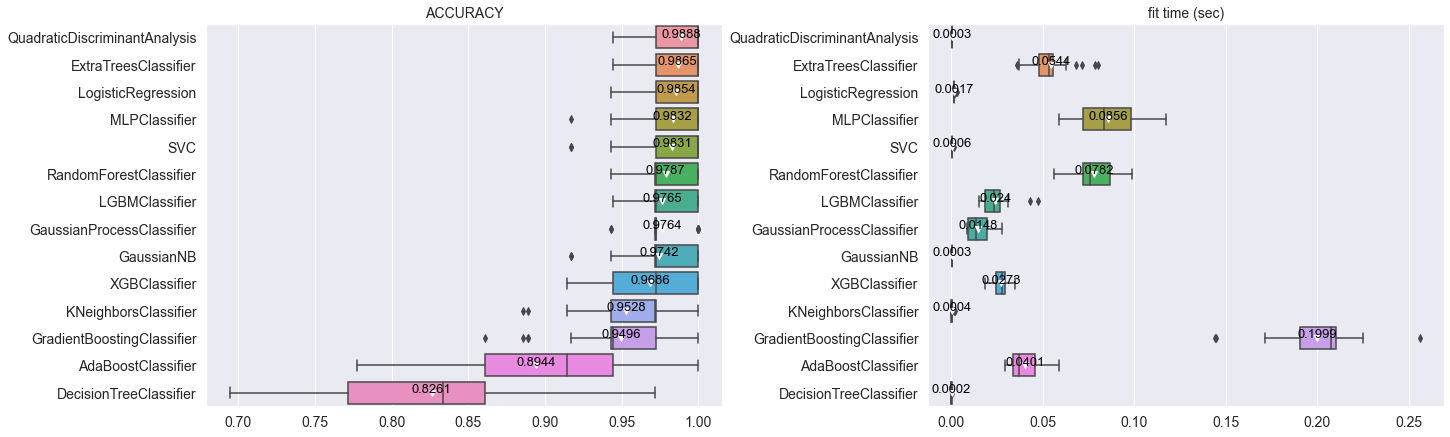

In [24]:
clf_new.show_cross_validation_result()

## Search Hyperparameters
- 파라미터 그리드(grid)를 생성하고, 하이퍼파라미터 튜닝을 통해 모델별 성능을 확인해 봅니다.

In [25]:
# 하이퍼파라미터 튜닝을 시도할 모델을 지정하고 파라미터 grid를 생성해 줍니다.
hyperparams_space = {
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
    },
    "RandomForestClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "criterion": ["gini", "entropy"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
    },
    "MLPClassifier": {
        "max_iter": [2000],
        "alpha": [1e-4],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs", "sgd", "adam"],
        "learning_rate_init": [0.001, 0.005, 0.01],
        "hidden_layer_sizes": [(2,), (3,), (4,), (5,)],
    },
    "LogisticRegression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
        "max_iter": [2000],
        "C": [0.01, 0.1, 10, 100],
        "tol": [0.01],
        "warm_start": [True, False],
        "fit_intercept": [True, False],
    },
    "GradientBoostingClassifier": {
        "loss": ["log_loss"],
        "learning_rate": [0.001, 0.01, 0.1],
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "subsample": [0.5, 1.0],
        "criterion": ["friedman_mse", "squared_error"],
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "max_features": ["sqrt", "log2", None],
        "n_iter_no_change": [5],
    },
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "colsample_bytree": [0.5],
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["mlogloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": [0.5],
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["multi_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

In [26]:
# 하이퍼파라미터 튜닝 결과를 생성합니다.
clf_new.search_hyperparameter(
    data=df_wine,
    target="label",
    hyperparams_space=hyperparams_space,
    search_method="random",
    kfold="RepeatedStratifiedKFold",
    scoring="accuracy",
    n_splits=5,
    n_repeats=5,
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> DecisionTreeClassifier running... 
param_grid:
{'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'splitter': ['best', 'random']}
fit_params: None
 Best Parameters: {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 55, 'criterion': 'entropy'} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> GradientBoostingClassifier running... 
param_grid:
{'criterion': ['friedman_mse', 'squared_error'],
 'learning_rate': [0.001, 0.01, 0.1],
 'loss': ['log_loss'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[792]	valid_0's binary_logloss: 0.0397294
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[785]	valid_0's binary_logloss: 0.0381161
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[791]	valid_0's binary_logloss: 0.0519552
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[111]	valid_0's binary_logloss: 0.0614522
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[198]	valid_0's binary_logloss: 0.0339199
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[136]	valid_0's binary_logloss: 0.0741426
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[201]	valid_0's binary_logloss

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[790]	valid_0's binary_logloss: 0.0349938
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[544]	valid_0's binary_logloss: 0.0813649
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[493]	valid_0's binary_logloss: 0.084169
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's binary_logloss: 0.0715333
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[154]	valid_0's binary_logloss: 0.0474393
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's binary_logloss: 0.0275614
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[661]	valid_0's binary_logloss: 0.0371589
Training until v

Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.0792127
Early stopping, best iteration is:
[208]	valid_0's binary_logloss: 0.0503638
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[396]	valid_0's binary_logloss: 0.0215925
Did not meet early stopping. Best iteration is:
[396]	valid_0's binary_logloss: 0.0215925
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's binary_logloss: 0.0275614
Early stopping, best iteration is:
[144]	valid_0's binary_logloss: 0.0275614
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.0739456
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.0404231
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[448]	valid_0's binary_logloss: 0.0213096
Early stopping, best iteration is:


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[787]	valid_0's binary_logloss: 0.0493821
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[791]	valid_0's binary_logloss: 0.0475326
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[566]	valid_0's binary_logloss: 0.0742121
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[161]	valid_0's binary_logloss: 0.0460946
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.0847596
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.0552371
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.0404231
Trai

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[703]	valid_0's binary_logloss: 0.0594322
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[602]	valid_0's binary_logloss: 0.0651117
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[569]	valid_0's binary_logloss: 0.0630751
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[393]	valid_0's binary_logloss: 0.0426096
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's binary_logloss: 0.0843342
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[546]	valid_0's binary_logloss: 0.0360283
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's binary_logloss: 0.0759732
Training until v

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[227]	valid_0's multi_logloss: 0.0564986
 Best Parameters: {'verbose': -1, 'objective': 'multiclass', 'n_estimators': 1000, 'max_depth': 70, 'learning_rate': 0.030999999999999996, 'colsample_bytree': 0.5} 
 Finished. (elapsed_time: 10s) 
------------------------------------------------------------------------------
 >>> LogisticRegression running... 
param_grid:
{'C': [0.01, 0.1, 10, 100],
 'fit_intercept': [True, False],
 'max_iter': [2000],
 'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
 'tol': [0.01],
 'warm_start': [True, False]}
fit_params: None
 Best Parameters: {'warm_start': False, 'tol': 0.01, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 2000, 'fit_intercept': True, 'C': 10} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> MLPClassifier running... 
param

/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't conv

/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't conv

 Best Parameters: {'solver': 'adam', 'max_iter': 2000, 'learning_rate_init': 0.005, 'hidden_layer_sizes': (2,), 'alpha': 0.0001, 'activation': 'logistic'} 
 Finished. (elapsed_time: 15s) 
------------------------------------------------------------------------------
 >>> RandomForestClassifier running... 
param_grid:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])}
fit_params: None
 Best Parameters: {'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 55, 'criterion': 'gini', 'bootstrap': True} 
 Finished. (elapsed_time: 77s) 
---------------

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,param_fit_intercept,param_C,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,param_activation,param_bootstrap,param_gamma,param_eval_metric,param_early_stopping_rounds
0,0.000198,0.000108,0.000099,0.000025,random,10,6,sqrt,100,gini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000211,0.000046,0.000086,0.000013,best,9,5,sqrt,30,entropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000162,0.000048,0.000092,0.000037,random,3,4,sqrt,95,gini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000126,0.000014,0.000075,0.000006,random,6,5,log2,45,entropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000191,0.000151,0.000114,0.000096,random,8,2,log2,70,entropy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.161587,0.026221,0.001233,0.000926,NaN,NaN,NaN,NaN,45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,mlogloss,100
346,0.096060,0.015689,0.001000,0.000646,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,mlogloss,100
347,0.199831,0.064779,0.001137,0.000678,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,mlogloss,100
348,0.080612,0.013739,0.001030,0.000540,NaN,NaN,NaN,NaN,60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,mlogloss,100


### Performance Metrics
- 튜닝한 모델의 성능을 확인해 봅니다.

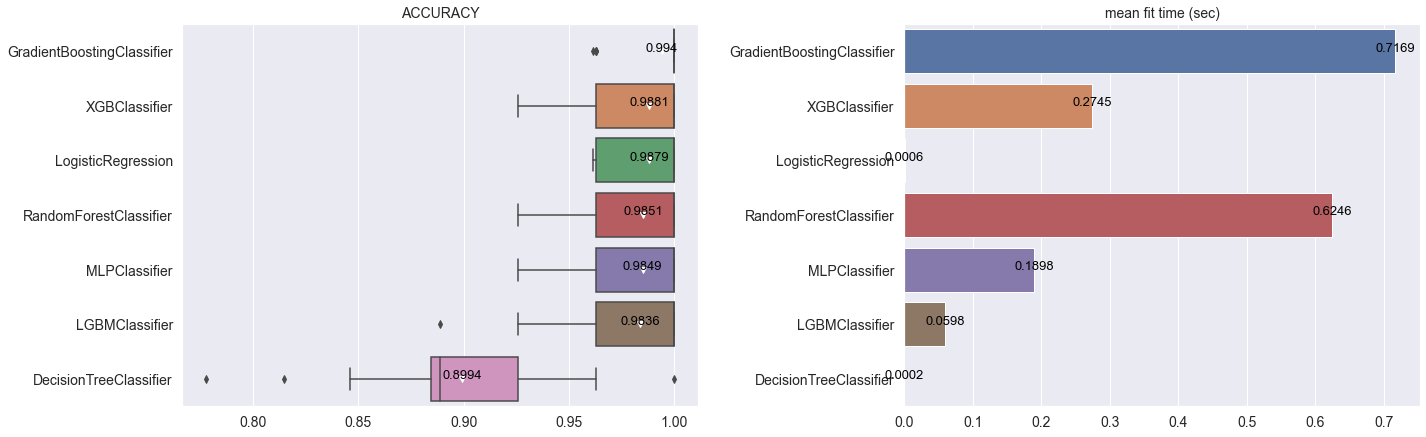

In [27]:
clf_new.show_hyperparameter_search_result()

## Feature Importance
- 튜닝한 모델의 Feature Importances를 확인해 봅니다.

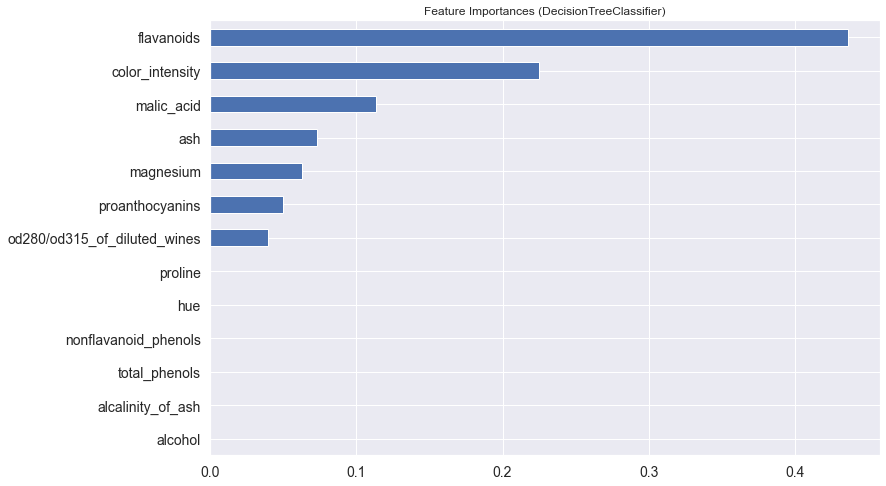

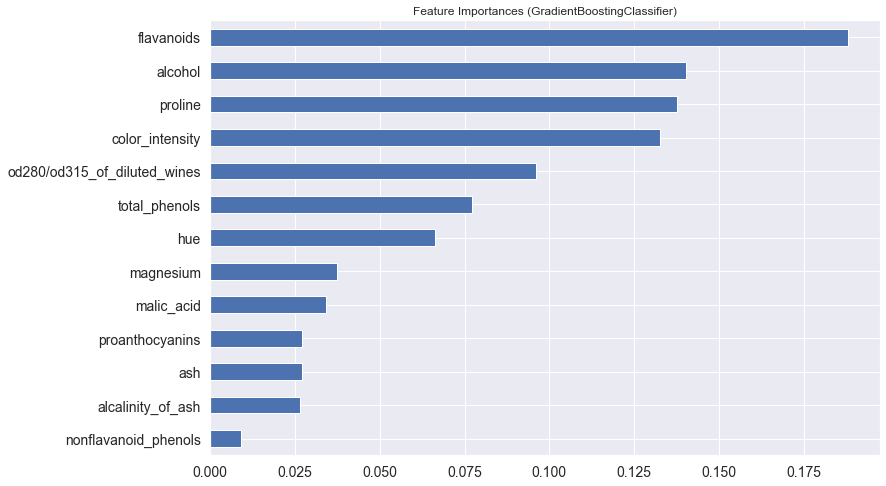

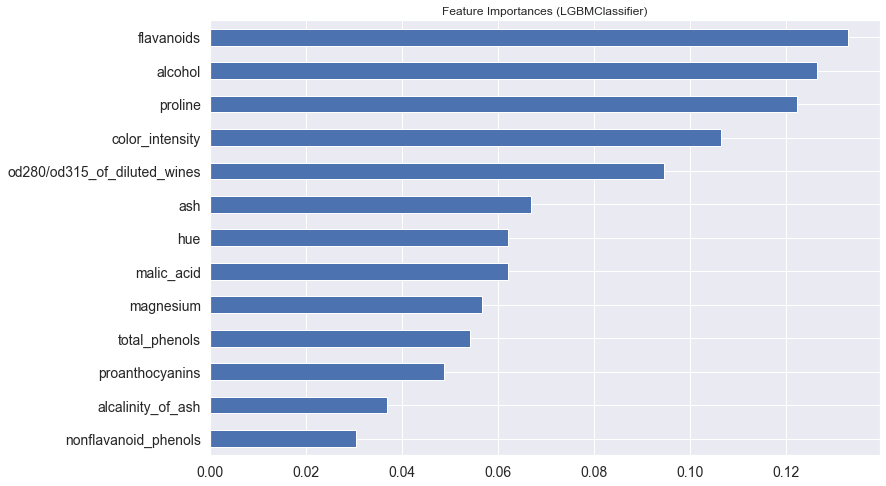

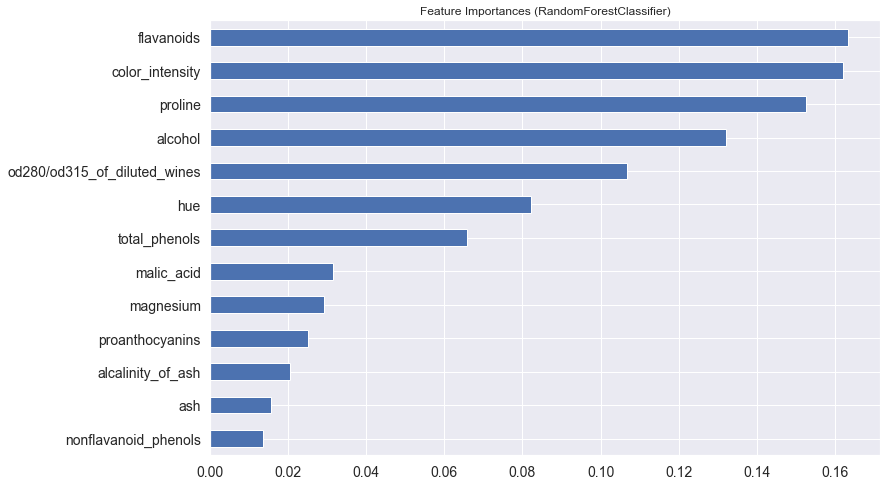

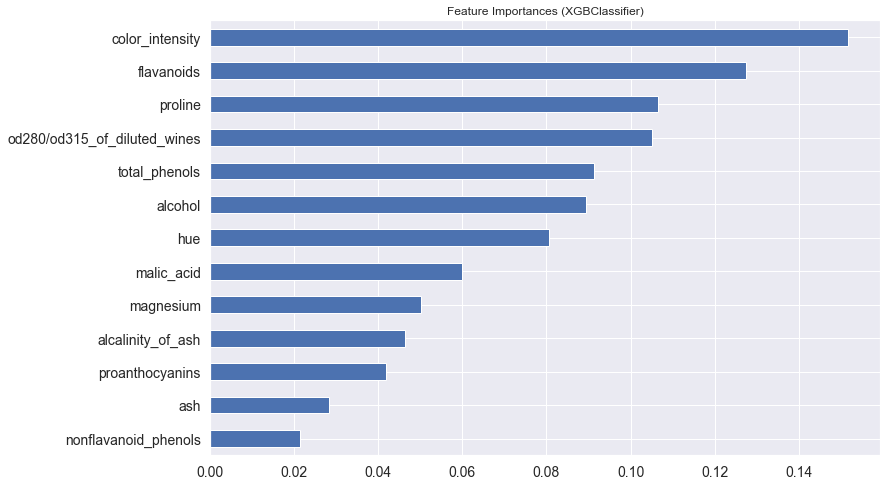

In [28]:
clf_new.show_feature_importances(n_features=20)  # 상위 20개까지만 추출합니다. (기본값: 10)

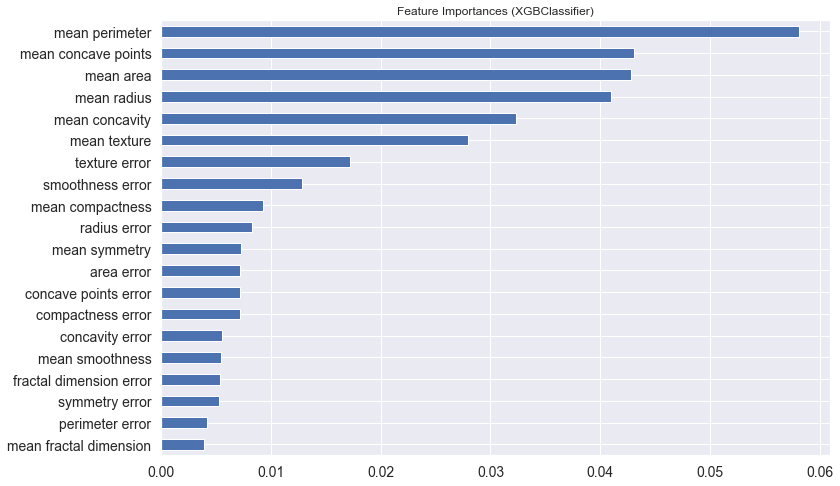

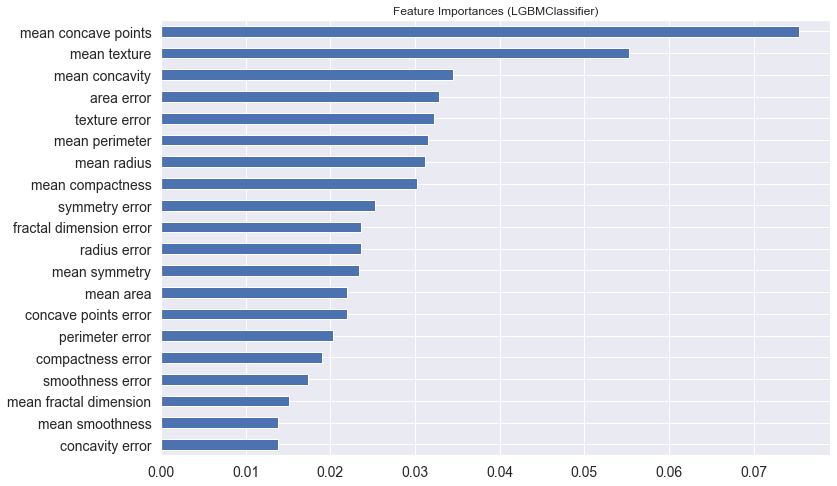

In [29]:
# 모델과 feature의 개수를 지정할 수도 있습니다.
clf.show_feature_importances(
    estimators=["XGBClassifier", "LGBMClassifier"],
    n_features=20,  # 상위 20개까지만 추출합니다. (기본값: 10)
)

## Permutation Importances
- 튜닝한 모델의 Permutation Importances를 확인해 봅니다.

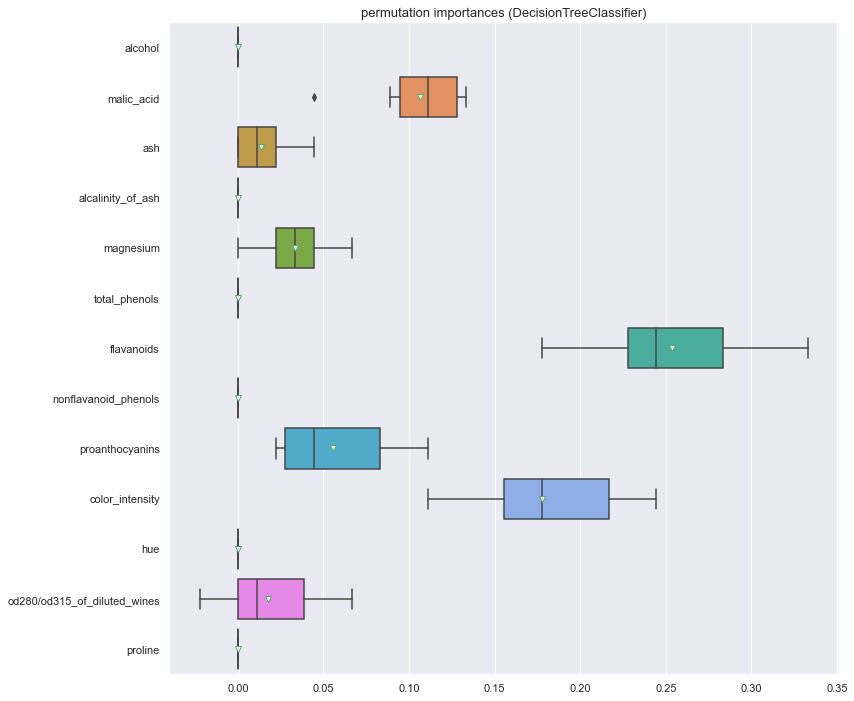

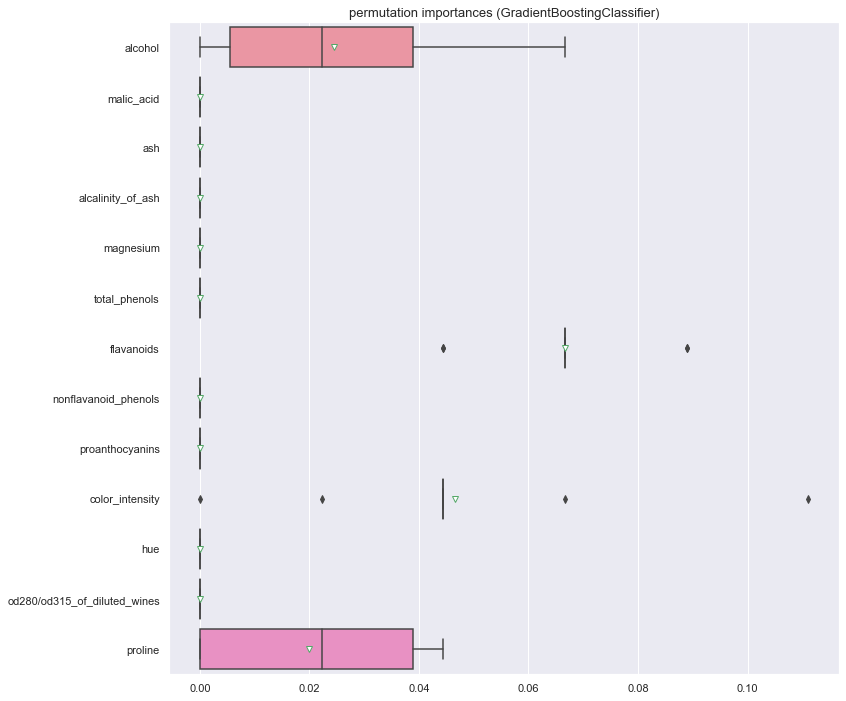

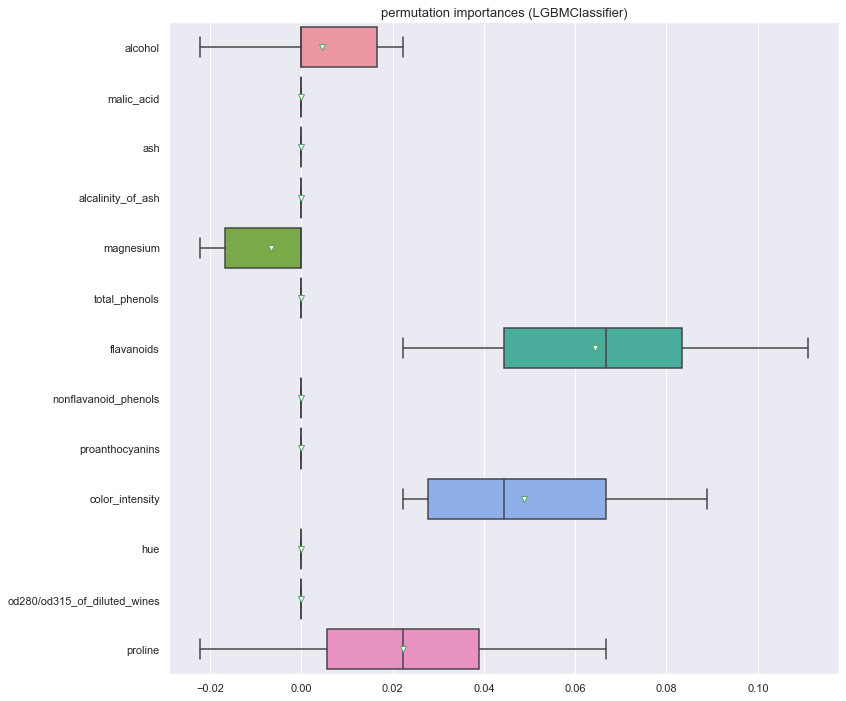

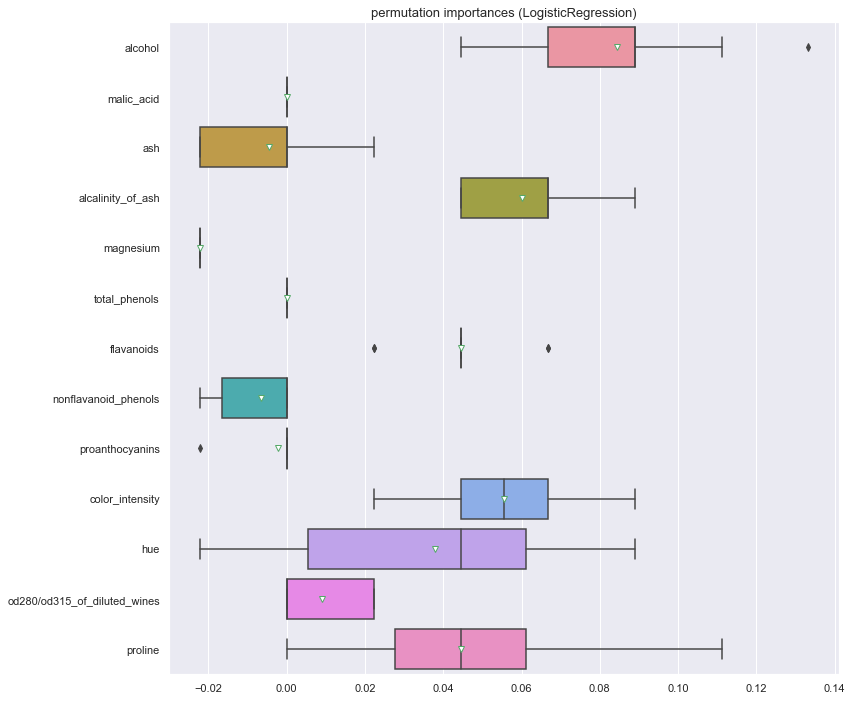

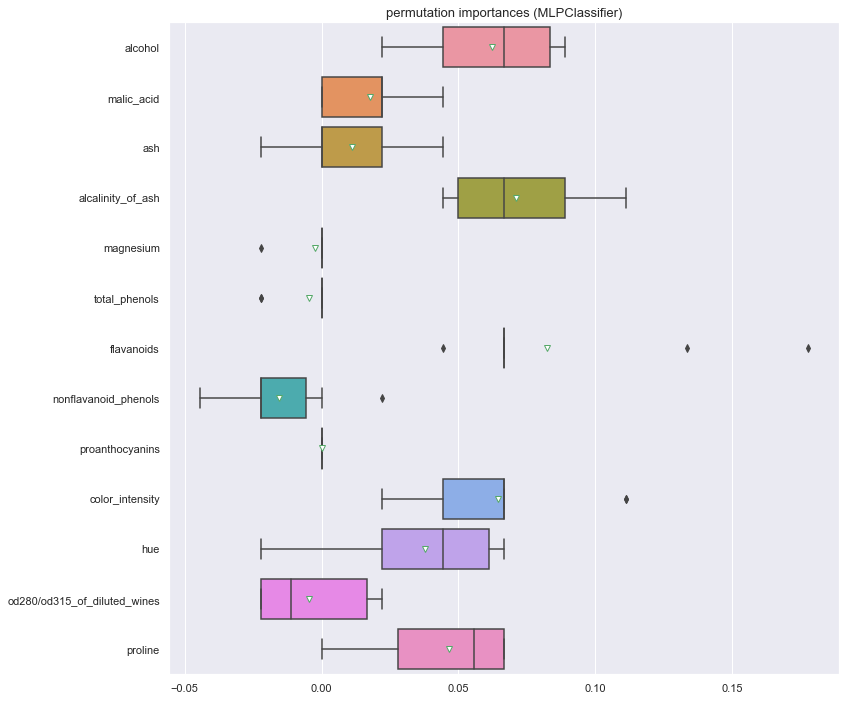

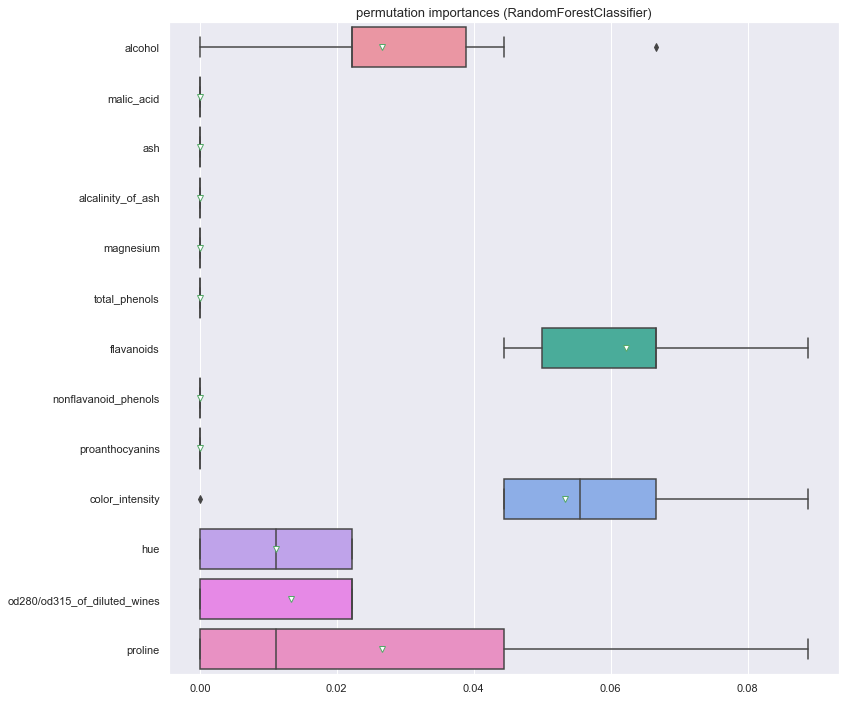

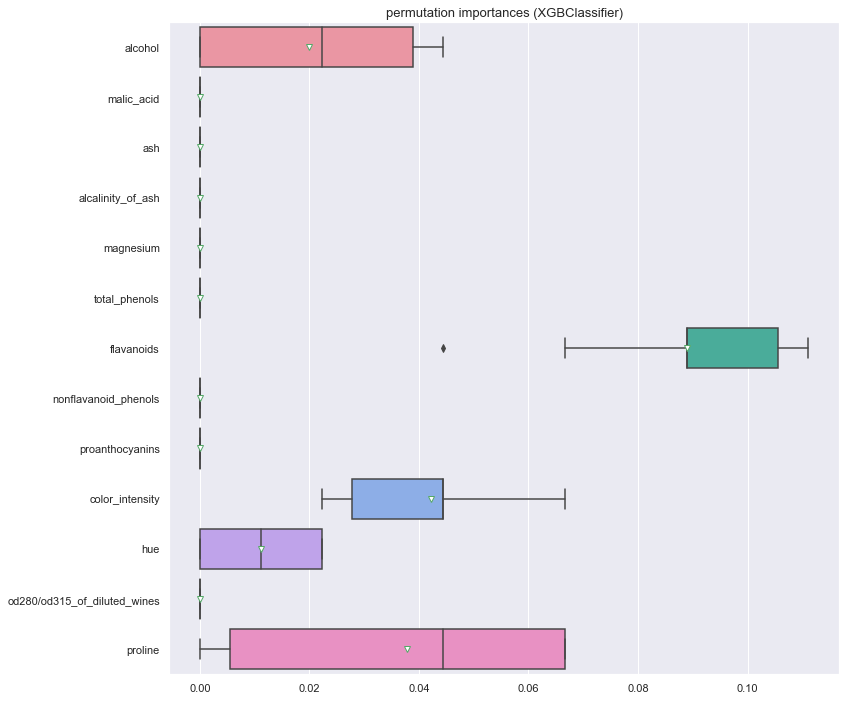

In [30]:
clf_new.show_permutation_importances(data=df_wine, target="label")

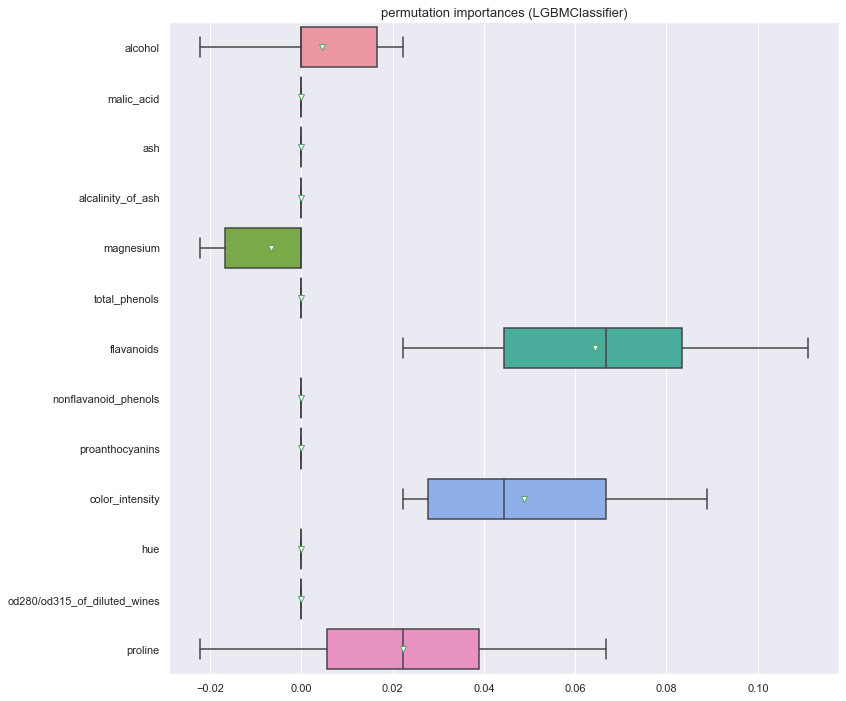

In [31]:
# 모델과 score를 따로 지정할 수도 있습니다.
clf_new.show_permutation_importances(
    estimators=["LGBMClassifier"],
    data=df_wine,
    target="label",
    scoring="accuracy",
)

##  Search Hyperparameters again
- 모델을 다시 튜닝해봅니다.
- 이미 객체는 clf_new에 만들어져 있으니 run_cv_model_hyperparams() 메서드만 재사용하시면 됩니다.
- 모델의 후보를 좁히거나, search, kfold, n_splits 등 파라미터를 다양하게 변경하면서 반복하여 사용할 수 있습니다.

In [32]:
hyperparams_space = {
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["mlogloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["multi_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

clf_new.search_hyperparameter(
    data=df_wine,
    target="label",
    hyperparams_space=hyperparams_space,
    search_method="random",
    kfold="StratifiedKFold",
    scoring="accuracy",
    n_splits=10,
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> LGBMClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x137ff35e0>,
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'objective': ['multiclass'],
 'verbose': [-1]}
fit_params: {'eval_metric': ['multi_logloss'], 'callbacks': [<function early_stopping.<locals>._callback at 0x15ab32280>]}
Did not meet early stopping. Best iteration is:
[393]	valid_0's binary_logloss: 0.0329748
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[376]	valid_0's binary_logloss: 0.0519949
Early stopping, best iteration is:
[376]	valid_0

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[212]	valid_0's multi_logloss: 0.0350493
 Best Parameters: {'colsample_bytree': 0.6545406989396434, 'learning_rate': 0.05099999999999999, 'max_depth': 50, 'n_estimators': 700, 'objective': 'multiclass', 'verbose': -1} 
 Finished. (elapsed_time: 5s) 
------------------------------------------------------------------------------
 >>> XGBClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x15b0dc9a0>,
 'early_stopping_rounds': [100],
 'eval_metric': ['mlogloss'],
 'gamma': [0.0, 0.1, 0.2],
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'objective': ['multi:softprob'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_objective,param_verbose,...,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score,estimator_name,param_early_stopping_rounds,param_eval_metric,param_gamma
0,0.057673,0.008322,0.000665,0.000226,0.619592,0.021,15,300,multiclass,-1,...,1.0,1.0,1.0,1.0,1.0,0.0,LGBMClassifier,NaN,NaN,NaN
1,0.030163,0.006136,0.000921,0.001578,0.536778,0.081,55,900,multiclass,-1,...,1.0,1.0,1.0,1.0,1.0,0.0,LGBMClassifier,NaN,NaN,NaN
2,0.043027,0.003848,0.001003,0.000772,0.95474,0.011,50,200,multiclass,-1,...,1.0,1.0,1.0,1.0,1.0,0.0,LGBMClassifier,NaN,NaN,NaN
3,0.034874,0.009372,0.000619,0.000505,0.874499,0.091,95,600,multiclass,-1,...,1.0,1.0,1.0,1.0,1.0,0.0,LGBMClassifier,NaN,NaN,NaN
4,0.049787,0.009525,0.000651,0.000362,0.474521,0.041,40,300,multiclass,-1,...,1.0,1.0,1.0,1.0,1.0,0.0,LGBMClassifier,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.083307,0.006476,0.000677,0.000023,0.732243,0.081,90,300,multi:softprob,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,XGBClassifier,100,mlogloss,0.1
96,0.172663,0.018114,0.001095,0.000437,0.408979,0.011,70,400,multi:softprob,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,XGBClassifier,100,mlogloss,0.2
97,0.312103,0.025441,0.001270,0.000635,0.614759,0.021,65,1000,multi:softprob,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,XGBClassifier,100,mlogloss,0.2
98,0.132849,0.022691,0.001114,0.000916,0.666952,0.091,90,400,multi:softprob,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,XGBClassifier,100,mlogloss,0.2


## Best Model
- 최종 모델을 확인해 봅니다. 이 코드를 실행하는 경로 내의 model_savled 폴더에 .joblib 파일로 생성되어 있습니다.

In [33]:
clf_new.get_best_model_info()

{'mean_test_score': 0.9923076923076923,
 'std_test_score': 0.02307692307692306,
 'mean_fit_time': 0.03410792350769043,
 'estimator_name': 'LGBMClassifier',
 'params': {'colsample_bytree': 0.46277050046376256,
  'learning_rate': 0.09099999999999998,
  'max_depth': 80,
  'n_estimators': 900,
  'objective': 'multiclass',
  'verbose': -1}}

In [34]:
# 최종 선택된 모델로 다시 예측해 봅니다.
features = df_wine.iloc[:, :-1].values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

best_model = clf_new.get_best_classifier()
pred = best_model.predict(features_scaled)

print(accuracy_score(df_wine["label"], pred))

 >>> Predict from new data. 
0.9943820224719101


## Load Model
- 로컬에 저장되어 있던 모델을 로드하여 실제 데이터로 다시 예측을 해봅니다. (LGBMClassifier이 저장된 것으로 가정)
- 이렇게 모델을 주기적으로 업데이트하여 저장해놓고, 업데이트된 모델을 실 예측에 사용하는 파이프라인 배치를 만들면 됩니다.

In [35]:
model = load("model_saved/LGBMClassifier.joblib")
pred = model.predict(X=features_scaled)

print(accuracy_score(df_wine["label"], pred))

0.9943820224719101
